# RANS ABL Mesh mapping

In [1]:
import matplotlib.pyplot as plt
import numpy as np


Implemented in `eval_coord()`:
$$
x(\xi) = \frac{\Delta_0}{r}  \frac{1-r^{\xi+1}}{1-r} - \frac{\Delta_0}{r}
$$

Implemented in `eval_fac()`:
$$
\frac{dx}{d\xi} = \frac{\Delta_0}{r} \frac{\xi+1}{r-1} r^\xi 
$$

In [2]:
coord = lambda xi, delta0, r: delta0*(1-r**(xi+1))/(1-r)/r - delta0/r
fac   = lambda xi, delta0, r: delta0*(r**xi)*log(r)

def plotgrid(ax, xivec, coordfunc, *args, **kwargs):
    for xi in xivec:
        x = coordfunc(xi, *args)
        #print(x)
        ax.axhline(x,**kwargs)
    return

def printgrid(xivec, coordfunc, *args):
    print('%-4s %8s %8s %s'%('xi','real x','cellsize','stretching'))
    for i, xi in enumerate(xivec):
        x = coordfunc(xi, *args)
        cellsize = 0.0 if i==0 else x - coordfunc(xivec[i-1], *args)
        sratio   = 0.0 if i<2  else cellsize/(coordfunc(xivec[i-1], *args)-coordfunc(xivec[i-2], *args))
        print('%-4i %8.4f %8.4f %8.4f'%(xi, x, cellsize, sratio))

In [3]:
Nxi    = 10
xi     = np.linspace(0,Nxi-1,Nxi)
delta0 = 0.1
r      = 1.1
#print(coord(0, delta0, r))
#print(coord(1, delta0, r))
#print(xi[0],delta0*((r**0) - r))
printgrid(xi, coord, delta0, r)

xi     real x cellsize stretching
0      0.0000   0.0000   0.0000
1      0.1000   0.1000   0.0000
2      0.2100   0.1100   1.1000
3      0.3310   0.1210   1.1000
4      0.4641   0.1331   1.1000
5      0.6105   0.1464   1.1000
6      0.7716   0.1611   1.1000
7      0.9487   0.1772   1.1000
8      1.1436   0.1949   1.1000
9      1.3579   0.2144   1.1000


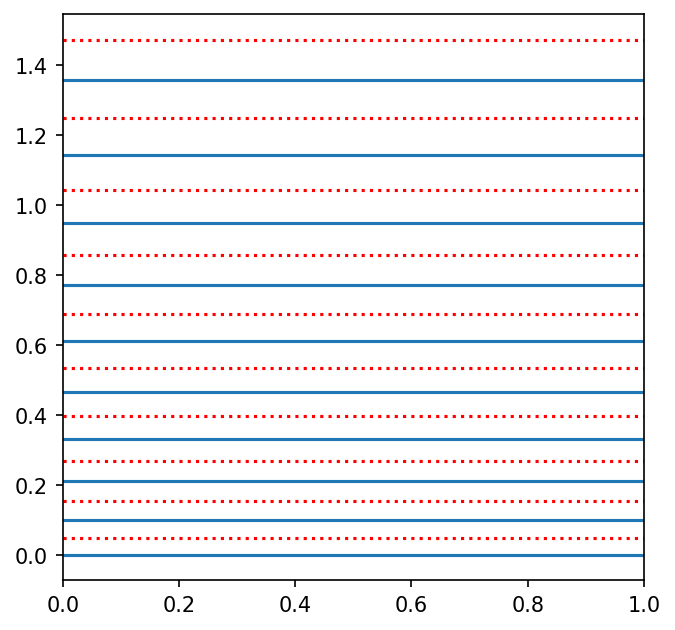

In [4]:
#Plot the grid
fig, ax = plt.subplots(1,1, figsize=(5,5), dpi=150)
plotgrid(ax, xi, coord, delta0, r)
plotgrid(ax, xi+0.5, coord, delta0, r, color='r', ls=':')